<a href="https://colab.research.google.com/github/robertchoi/BatteryDatasetImplementation/blob/master/LSTM_%EC%B9%BC%EB%A7%8C%ED%95%84%ED%84%B0%EC%97%86%EC%9D%B4_%EC%85%801.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
forecasting = 20

In [80]:
import os
import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers, Sequential
from keras.layers import RNN
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.layers.core import Activation, Dense, Dropout
from keras import layers, models
from sklearn import preprocessing
from keras import datasets
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn import model_selection

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0222_20110307012737_cell_1.csv', encoding='utf8')
df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,1,0.259,2.23,-20
1,2011.3.7 18:29,1,0.260,2.23,-20
2,2011.3.8 6:29,1,0.259,2.23,-20
3,2011.3.8 18:29,1,0.259,2.23,-20
4,2011.3.9 6:29,1,0.259,2.23,-20
...,...,...,...,...,...
254,2011.8.30 5:28,1,0.301,2.23,-20
255,2011.8.30 17:28,1,0.301,2.23,-20
256,2011.8.31 5:28,1,0.302,2.23,-20
257,2011.8.31 16:09,1,0.300,2.23,-20


In [83]:
df = df['Resistance']
df

0      0.259
1      0.260
2      0.259
3      0.259
4      0.259
       ...  
254    0.301
255    0.301
256    0.302
257    0.300
258    0.296
Name: Resistance, Length: 259, dtype: float64

In [84]:
n_samples = len(df)

In [85]:
def make_dataset(data, label, window_size=forecasting):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [86]:
x_train = df
y_train = df
x_train

0      0.259
1      0.260
2      0.259
3      0.259
4      0.259
       ...  
254    0.301
255    0.301
256    0.302
257    0.300
258    0.296
Name: Resistance, Length: 259, dtype: float64

In [87]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

In [89]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

In [90]:
lookback = len(df)
print(lookback)
train_feature, train_label = make_dataset(x_train, y_train, lookback-1)
train_feature.shape


259


(1, 258, 1)

In [91]:
model = Sequential()
model.add(LSTM(30, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dropout(0.1))
model.add(Dense(1))

In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30)                3840      
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
h = model.fit(train_feature, train_label, 
                    epochs=500, 
                    batch_size=1, verbose=2)

Epoch 1/500
1/1 - 1s - loss: 0.7489 - mse: 0.7489
Epoch 2/500
1/1 - 0s - loss: 0.7336 - mse: 0.7336
Epoch 3/500
1/1 - 0s - loss: 0.7760 - mse: 0.7760
Epoch 4/500
1/1 - 0s - loss: 0.7058 - mse: 0.7058
Epoch 5/500
1/1 - 0s - loss: 0.6629 - mse: 0.6629
Epoch 6/500
1/1 - 0s - loss: 0.6752 - mse: 0.6752
Epoch 7/500
1/1 - 0s - loss: 0.7412 - mse: 0.7412
Epoch 8/500
1/1 - 0s - loss: 0.5998 - mse: 0.5998
Epoch 9/500
1/1 - 0s - loss: 0.5795 - mse: 0.5795
Epoch 10/500
1/1 - 0s - loss: 0.5593 - mse: 0.5593
Epoch 11/500
1/1 - 0s - loss: 0.5233 - mse: 0.5233
Epoch 12/500
1/1 - 0s - loss: 0.6087 - mse: 0.6087
Epoch 13/500
1/1 - 0s - loss: 0.5116 - mse: 0.5116
Epoch 14/500
1/1 - 0s - loss: 0.4695 - mse: 0.4695
Epoch 15/500
1/1 - 0s - loss: 0.5294 - mse: 0.5294
Epoch 16/500
1/1 - 0s - loss: 0.5233 - mse: 0.5233
Epoch 17/500
1/1 - 0s - loss: 0.4205 - mse: 0.4205
Epoch 18/500
1/1 - 0s - loss: 0.4004 - mse: 0.4004
Epoch 19/500
1/1 - 0s - loss: 0.3656 - mse: 0.3656
Epoch 20/500
1/1 - 0s - loss: 0.3592 - m

In [94]:
error_select = []

오차율 =  [0.0800387]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Unrecognized location 'upper ajleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Text(0, 0.5, 'Voltage [V]')

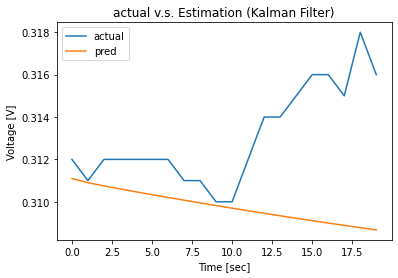

In [95]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_03.csv', encoding='utf8')

test_df = test_df['Resistance']

n_samples = len(test_df)
test_df_re = test_df[:n_samples-forecasting]

# print(test_df_re)
x_train = test_df_re
y_train = test_df_re

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
# print(x_train)
train_feature, train_label = make_dataset(x_train, y_train, n_samples-forecasting-1)
# print(train_feature.shape)
# print(train_feature)
look_ahead=forecasting
xhat = train_feature[0]
predictions = np.zeros((look_ahead, 1))


for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  # print("xhat = ", xhat)
  # print("predddd = ", prediction)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])
# print("aa = ",len(predictions))
# print(predictions)

pred = scaler.inverse_transform(predictions)

error_avg = 0

actual = test_df[n_samples-forecasting:].values
# print(actual)
for i in range(forecasting):
    
    error = abs((actual[i]-pred[i])/ actual[i]*100)
    error_avg = error_avg + error
print("오차율 = ",(error_avg/n_samples))
error_select.append((error_avg/n_samples))

plt.plot(actual, label='actual')
plt.plot(pred, label='pred')
plt.legend(loc='upper ajleft')
plt.title('actual v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')

오차율 =  [0.9105969]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Unrecognized location 'upper ajleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Text(0, 0.5, 'Voltage [V]')

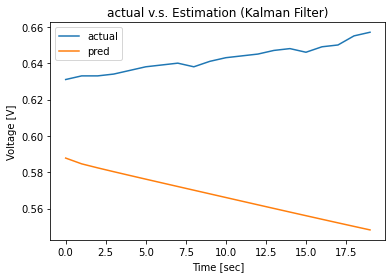

In [96]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_06.csv', encoding='utf8')

test_df = test_df['Resistance']

n_samples = len(test_df)
test_df_re = test_df[:n_samples-forecasting]

# print(test_df_re)
x_train = test_df_re
y_train = test_df_re

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
# print(x_train)
train_feature, train_label = make_dataset(x_train, y_train, n_samples-forecasting-1)
# print(train_feature.shape)
# print(train_feature)
look_ahead=forecasting
xhat = train_feature[0]
predictions = np.zeros((look_ahead, 1))


for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  # print("xhat = ", xhat)
  # print("predddd = ", prediction)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])
# print("aa = ",len(predictions))
# print(predictions)

pred = scaler.inverse_transform(predictions)

error_avg = 0

actual = test_df[n_samples-forecasting:].values
# print(actual)
for i in range(forecasting):
    
    error = abs((actual[i]-pred[i])/ actual[i]*100)
    error_avg = error_avg + error
print("오차율 = ",(error_avg/n_samples))
error_select.append((error_avg/n_samples))

plt.plot(actual, label='actual')
plt.plot(pred, label='pred')
plt.legend(loc='upper ajleft')
plt.title('actual v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')

오차율 =  [1.320392]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Unrecognized location 'upper ajleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Text(0, 0.5, 'Voltage [V]')

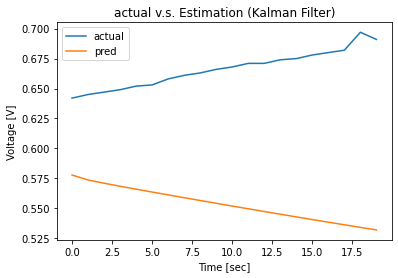

In [97]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_7.csv', encoding='utf8')

test_df = test_df['Resistance']

n_samples = len(test_df)
test_df_re = test_df[:n_samples-forecasting]

# print(test_df_re)
x_train = test_df_re
y_train = test_df_re

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
# print(x_train)
train_feature, train_label = make_dataset(x_train, y_train, n_samples-forecasting-1)
# print(train_feature.shape)
# print(train_feature)
look_ahead=forecasting
xhat = train_feature[0]
predictions = np.zeros((look_ahead, 1))


for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  # print("xhat = ", xhat)
  # print("predddd = ", prediction)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])
# print("aa = ",len(predictions))
# print(predictions)

pred = scaler.inverse_transform(predictions)

error_avg = 0

actual = test_df[n_samples-forecasting:].values
# print(actual)
for i in range(forecasting):
    
    error = abs((actual[i]-pred[i])/ actual[i]*100)
    error_avg = error_avg + error
print("오차율 = ",(error_avg/n_samples))
error_select.append((error_avg/n_samples))

plt.plot(actual, label='actual')
plt.plot(pred, label='pred')
plt.legend(loc='upper ajleft')
plt.title('actual v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')

오차율 =  [0.16878693]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Unrecognized location 'upper ajleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Text(0, 0.5, 'Voltage [V]')

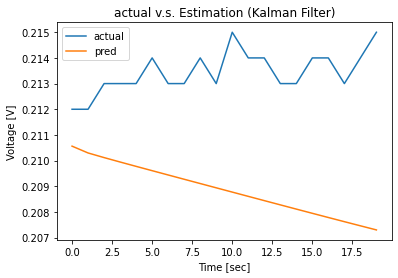

In [98]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_9.csv', encoding='utf8')

test_df = test_df['Resistance']

n_samples = len(test_df)
test_df_re = test_df[:n_samples-forecasting]

# print(test_df_re)
x_train = test_df_re
y_train = test_df_re

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
# print(x_train)
train_feature, train_label = make_dataset(x_train, y_train, n_samples-forecasting-1)
# print(train_feature.shape)
# print(train_feature)
look_ahead=forecasting
xhat = train_feature[0]
predictions = np.zeros((look_ahead, 1))


for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  # print("xhat = ", xhat)
  # print("predddd = ", prediction)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])
# print("aa = ",len(predictions))
# print(predictions)

pred = scaler.inverse_transform(predictions)

error_avg = 0

actual = test_df[n_samples-forecasting:].values
# print(actual)
for i in range(forecasting):
    
    error = abs((actual[i]-pred[i])/ actual[i]*100)
    error_avg = error_avg + error
print("오차율 = ",(error_avg/n_samples))
error_select.append((error_avg/n_samples))

plt.plot(actual, label='actual')
plt.plot(pred, label='pred')
plt.legend(loc='upper ajleft')
plt.title('actual v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')

오차율 =  [0.60481892]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Unrecognized location 'upper ajleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Text(0, 0.5, 'Voltage [V]')

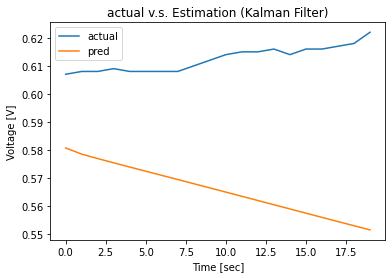

In [99]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_18.csv', encoding='utf8')

test_df = test_df['Resistance']

n_samples = len(test_df)
test_df_re = test_df[:n_samples-forecasting]

# print(test_df_re)
x_train = test_df_re
y_train = test_df_re

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
# print(x_train)
train_feature, train_label = make_dataset(x_train, y_train, n_samples-forecasting-1)
# print(train_feature.shape)
# print(train_feature)
look_ahead=forecasting
xhat = train_feature[0]
predictions = np.zeros((look_ahead, 1))


for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  # print("xhat = ", xhat)
  # print("predddd = ", prediction)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])
# print("aa = ",len(predictions))
# print(predictions)

pred = scaler.inverse_transform(predictions)

error_avg = 0

actual = test_df[n_samples-forecasting:].values
# print(actual)
for i in range(forecasting):
    
    error = abs((actual[i]-pred[i])/ actual[i]*100)
    error_avg = error_avg + error
print("오차율 = ",(error_avg/n_samples))
error_select.append((error_avg/n_samples))

plt.plot(actual, label='actual')
plt.plot(pred, label='pred')
plt.legend(loc='upper ajleft')
plt.title('actual v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')

오차율 =  [0.13131462]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Unrecognized location 'upper ajleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Text(0, 0.5, 'Voltage [V]')

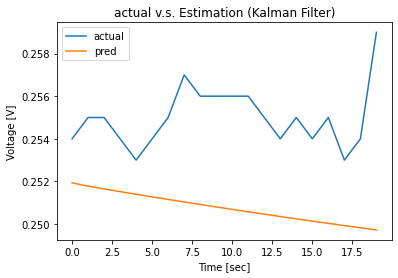

In [100]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_19.csv', encoding='utf8')

test_df = test_df['Resistance']

n_samples = len(test_df)
test_df_re = test_df[:n_samples-forecasting]

# print(test_df_re)
x_train = test_df_re
y_train = test_df_re

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
# print(x_train)
train_feature, train_label = make_dataset(x_train, y_train, n_samples-forecasting-1)
# print(train_feature.shape)
# print(train_feature)
look_ahead=forecasting
xhat = train_feature[0]
predictions = np.zeros((look_ahead, 1))


for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  # print("xhat = ", xhat)
  # print("predddd = ", prediction)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])
# print("aa = ",len(predictions))
# print(predictions)

pred = scaler.inverse_transform(predictions)

error_avg = 0

actual = test_df[n_samples-forecasting:].values
# print(actual)
for i in range(forecasting):
    
    error = abs((actual[i]-pred[i])/ actual[i]*100)
    error_avg = error_avg + error
print("오차율 = ",(error_avg/n_samples))
error_select.append((error_avg/n_samples))

plt.plot(actual, label='actual')
plt.plot(pred, label='pred')
plt.legend(loc='upper ajleft')
plt.title('actual v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')

오차율 =  [0.23173536]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Unrecognized location 'upper ajleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Text(0, 0.5, 'Voltage [V]')

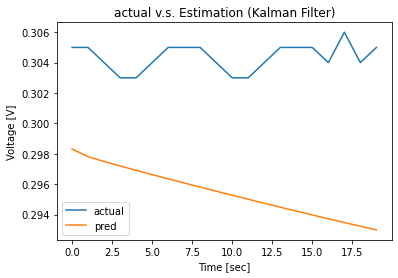

In [101]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_20.csv', encoding='utf8')

test_df = test_df['Resistance']

n_samples = len(test_df)
test_df_re = test_df[:n_samples-forecasting]

# print(test_df_re)
x_train = test_df_re
y_train = test_df_re

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
# print(x_train)
train_feature, train_label = make_dataset(x_train, y_train, n_samples-forecasting-1)
# print(train_feature.shape)
# print(train_feature)
look_ahead=forecasting
xhat = train_feature[0]
predictions = np.zeros((look_ahead, 1))


for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  # print("xhat = ", xhat)
  # print("predddd = ", prediction)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])
# print("aa = ",len(predictions))
# print(predictions)

pred = scaler.inverse_transform(predictions)

error_avg = 0

actual = test_df[n_samples-forecasting:].values
# print(actual)
for i in range(forecasting):
    
    error = abs((actual[i]-pred[i])/ actual[i]*100)
    error_avg = error_avg + error
print("오차율 = ",(error_avg/n_samples))
error_select.append((error_avg/n_samples))

plt.plot(actual, label='actual')
plt.plot(pred, label='pred')
plt.legend(loc='upper ajleft')
plt.title('actual v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')

오차율 =  [0.15663123]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Unrecognized location 'upper ajleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Text(0, 0.5, 'Voltage [V]')

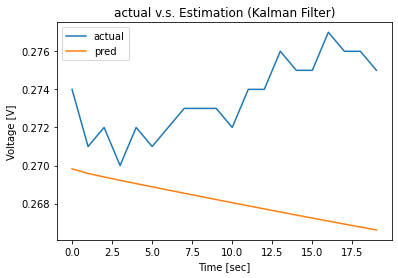

In [102]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_22.csv', encoding='utf8')

test_df = test_df['Resistance']

n_samples = len(test_df)
test_df_re = test_df[:n_samples-forecasting]

# print(test_df_re)
x_train = test_df_re
y_train = test_df_re

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
# print(x_train)
train_feature, train_label = make_dataset(x_train, y_train, n_samples-forecasting-1)
# print(train_feature.shape)
# print(train_feature)
look_ahead=forecasting
xhat = train_feature[0]
predictions = np.zeros((look_ahead, 1))


for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  # print("xhat = ", xhat)
  # print("predddd = ", prediction)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])
# print("aa = ",len(predictions))
# print(predictions)

pred = scaler.inverse_transform(predictions)

error_avg = 0

actual = test_df[n_samples-forecasting:].values
# print(actual)
for i in range(forecasting):
    
    error = abs((actual[i]-pred[i])/ actual[i]*100)
    error_avg = error_avg + error
print("오차율 = ",(error_avg/n_samples))
error_select.append((error_avg/n_samples))

plt.plot(actual, label='actual')
plt.plot(pred, label='pred')
plt.legend(loc='upper ajleft')
plt.title('actual v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')

오차율 =  [0.82295125]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Unrecognized location 'upper ajleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Text(0, 0.5, 'Voltage [V]')

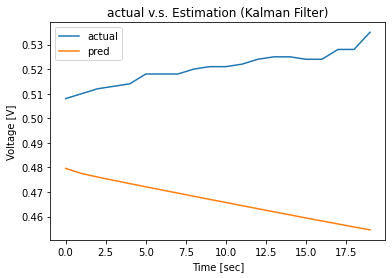

In [103]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_23.csv', encoding='utf8')

test_df = test_df['Resistance']

n_samples = len(test_df)
test_df_re = test_df[:n_samples-forecasting]

# print(test_df_re)
x_train = test_df_re
y_train = test_df_re

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
# print(x_train)
train_feature, train_label = make_dataset(x_train, y_train, n_samples-forecasting-1)
# print(train_feature.shape)
# print(train_feature)
look_ahead=forecasting
xhat = train_feature[0]
predictions = np.zeros((look_ahead, 1))


for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  # print("xhat = ", xhat)
  # print("predddd = ", prediction)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])
# print("aa = ",len(predictions))
# print(predictions)

pred = scaler.inverse_transform(predictions)

# print(pred)
error_avg = 0
actual = test_df[n_samples-forecasting:].values
# print(actual)
for i in range(forecasting):
    
    error = abs((actual[i]-pred[i])/ actual[i]*100)
    error_avg = error_avg + error
print("오차율 = ",(error_avg/n_samples))
error_select.append((error_avg/n_samples))

plt.plot(actual, label='actual')
plt.plot(pred, label='pred')
plt.legend(loc='upper ajleft')
plt.title('actual v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')

In [104]:
error_select

[array([0.0800387]),
 array([0.9105969]),
 array([1.320392]),
 array([0.16878693]),
 array([0.60481892]),
 array([0.13131462]),
 array([0.23173536]),
 array([0.15663123]),
 array([0.82295125])]